In [165]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto
import gzip
from collections import Counter

import os
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.statistics.traces.generic.log import case_statistics

import pm4py
import pandas as pd
# %pip install pm4py
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Process Discovery

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.batches import algorithm 

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

File upload and file implementation


In [167]:
from pm4py.objects.log.importer.xes import importer as xes_importer

In [168]:
dom_dec = xes_importer.apply("/content/DomesticDeclarations.xes.gz")
int_dec = xes_importer.apply("/content/InternationalDeclarations.xes.gz")
per_log = xes_importer.apply("/content/PermitLog.xes.gz")
pre_log = xes_importer.apply("/content/PrepaidTravelCost.xes.gz")
req_log = xes_importer.apply("/content/RequestForPayment.xes.gz")

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/7065 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/2099 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6886 [00:00<?, ?it/s]

Printing Total cases for each file

In [169]:
len(dom_dec)

10500

In [170]:
len(per_log)

7065

In [171]:
len(pre_log)

2099

In [172]:
len(req_log)

6886

In [173]:
len(int_dec)

6449

# Informative Visualization

In [174]:
len(int_dec)

6449

Roles with activities

In [175]:

dom_dec_logg2 = log_converter.apply(dom_dec, variant=log_converter.Variants.TO_DATA_FRAME)
results = []
for name, log in dom_dec_logg2.items():
    res = dom_dec_logg2['org:role'].value_counts()
    print(res)
    results.append(res)
    break

UNDEFINED         20084
EMPLOYEE          13031
SUPERVISOR        10425
ADMINISTRATION     9155
BUDGET OWNER       2879
PRE_APPROVER        772
MISSING              91
Name: org:role, dtype: int64


In [176]:
len(dom_dec)

10500

Value: Employee 

Frequency : 29338

In [177]:

dec_logg2 = log_converter.apply(int_dec, variant=log_converter.Variants.TO_DATA_FRAME)
results = []
for name, log in dec_logg2.items():
    res = dec_logg2['org:role'].value_counts()
    print(res)
    results.append(res)
    break

EMPLOYEE          29338
UNDEFINED         12804
SUPERVISOR        12535
ADMINISTRATION    11508
BUDGET OWNER       3668
PRE_APPROVER       1255
DIRECTOR            897
MISSING             146
Name: org:role, dtype: int64


Looking for the mean and median of the amounts from Int Dec and Domestic Dec

Requested Amounts


In [178]:
amounts = []
int_dec_amount = []
for trace in int_dec:
    amounts.append(int(float(trace[0]['case:Amount'])))
    int_dec_amount.append(int(float(trace[0]['case:Amount'])))
for trace in dom_dec:
    amounts.append(int(float(trace[0]['case:Amount']))) 

In [179]:
print('Median of  amounts: %s' %np.median(amounts))
print('Mean of  amounts: %s' %np.mean(amounts))

Median of  amounts: 79.0
Mean of  amounts: 344.84618561567055


In [180]:
print('Median of int dec amounts: %s' %np.median(int_dec_amount))
print('Mean of int dec amounts: %s' %np.mean(int_dec_amount))

Median of int dec amounts: 509.0
Mean of int dec amounts: 766.4048689719336


Median: the middle number in the set of values. You find it by putting the numbers in order from the smallest to largest and covering up one number on each end until you get to the middle.

# Converting data to Dataframe for preprocessing/filtering

In [181]:
dataframe = pm4py.convert_to_dataframe(int_dec)
dataframe.to_csv('exported_int.csv')


In [182]:
df_int = pd.read_csv('exported_int.csv')


In [183]:
df_int.head()

,Unnamed: 0,id,org:resource,concept:name,time:timestamp,org:role,case:Permit travel permit number,case:DeclarationNumber,case:Amount,case:RequestedAmount,...,case:concept:name,case:Permit OrganizationalEntity,case:travel permit number,case:Permit RequestedBudget,case:id,case:Permit ID,case:Permit id,case:BudgetNumber,case:Permit ActivityNumber,case:AdjustedAmount
0,0,rv_travel permit 76455_6,STAFF MEMBER,Start trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
1,1,rv_travel permit 76455_7,STAFF MEMBER,End trip,2016-10-05 00:00:00+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
2,2,st_step 76459_0,STAFF MEMBER,Permit SUBMITTED by EMPLOYEE,2017-04-06 13:32:10+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
3,3,st_step 76460_0,STAFF MEMBER,Permit FINAL_APPROVED by SUPERVISOR,2017-04-06 13:32:28+02:00,SUPERVISOR,travel permit number 76456,declaration number 76458,39.664561,39.664561,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561
4,4,st_step 76461_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-04-07 13:38:14+02:00,EMPLOYEE,travel permit number 76456,declaration number 76458,39.664561,39.664561,...,declaration 76457,organizational unit 65458,travel permit number 76456,41.613445,declaration 76457,travel permit 76455,travel permit 76455,budget 144133,activity 46005,39.664561


In [184]:
from pm4py.objects.log.util import dataframe_utils


In [185]:
df_int = dataframe_utils.convert_timestamp_columns_in_df(df_int)


In [186]:
print('UNKNOWN' in df_int['case:DeclarationNumber'].values)


True


In [187]:
df_int = df_int[df_int['case:DeclarationNumber'] != "UNKNOWN"]
df_int = df_int[df_int['case:Permit travel permit number'] != "UNKNOWN"]
df_int = df_int[df_int['case:Permit TaskNumber'] != "UNKNOWN"]

In [188]:
print('UNKNOWN' in df_int['case:DeclarationNumber'].values)


False


In [189]:
df_int.columns

Index(['Unnamed: 0', 'id', 'org:resource', 'concept:name', 'time:timestamp',
       'org:role', 'case:Permit travel permit number',
       'case:DeclarationNumber', 'case:Amount', 'case:RequestedAmount',
       'case:Permit TaskNumber', 'case:Permit BudgetNumber',
       'case:OriginalAmount', 'case:Permit ProjectNumber', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:travel permit number',
       'case:Permit RequestedBudget', 'case:id', 'case:Permit ID',
       'case:Permit id', 'case:BudgetNumber', 'case:Permit ActivityNumber',
       'case:AdjustedAmount'],
      dtype='object')

In [190]:
int_dec = pm4py.convert_to_event_log(df_int)


In [191]:
len(int_dec)

3947

Filtering by timeframe interval
#Filtering data by year
starting from 2018 and only consider after 2018

In the analysis of the data, We filtered years by only 2018 and 2019 using the pm4py filter time range function. The reason behind the filtering year is the process in the 2017 year is not stable. 


The BPI Challenge 2020 website also specified that 2017 data contains only two departments

In [192]:
int_dec = pm4py.filter_time_range(int_dec, "2018-01-01 00:00:00","2019-02-25 00:00:00",mode = 'traces_contained')
dom_dec = pm4py.filter_time_range(int_dec, "2018-06-01 00:00:00","2019-10-02 00:00:00",mode = 'traces_contained')

In [193]:
len(int_dec)

2901

In [194]:
len(dom_dec)

1244

Filtering start and end 

For what happened if we not filter by start and end Alpha miner graph provided in the report


In [195]:
int_dec = pm4py.filter_event_attribute_values(int_dec, 'concept:name', 'Start trip')
len(int_dec)

2901

In [196]:
int_dec = pm4py.filter_event_attribute_values(int_dec, 'concept:name', 'End trip')
len(int_dec)

2901

In [197]:
int_dec_datalog = log_converter.apply(int_dec, variant=log_converter.Variants.TO_DATA_FRAME)

profile = int_dec_datalog.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ','.join(x) ),\
Resource = ('org:resource', 'nunique'),\
Duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)

# Finding bottlenecks

 Checking the payment handled or not

In [198]:

def declaration_settled(declaration):
    for event in declaration:
        if (event["concept:name"] == "Payment Handled"):
            return True
    return False

In [199]:
total = 0
for trace in int_dec:
    was_payed = declaration_settled(trace)
    if (not was_payed):
        continue
    total += 1
    
print("Total trace:",len(int_dec))
print("Total handled: ",total)

Total trace: 2901
Total handled:  2900


**Rejection Analysis of International Declarations**

Functions for declarations analysis

get_rejections function is for returning the roles for rejections

In [200]:
def get_rejections(log):
    
    collector = []
    
    for trace in log:
        rejected = False
        for event in trace:
            if 'Declaration REJECTED' in event['concept:name']:
                if not rejected:
                    rejected = True
                    collector.append(event['org:role'])
                elif rejected and 'EMPLOYEE' not in event['org:role']:
                    collector.append(event['org:role'])
            elif 'Declaration SUBMITTED' in event['concept:name']:
                rejected = False
                
    return collector

Below function is for the role and rejection for that role

In [201]:
def get_rejections_per_role(collection: list):

    results = {'Role':[], 'Rejections': [], 'Rejections rel.': []}
    
    print('{:<17s}{:^12s}'.format('Role', 'Rejections'))
    print('-'*29)

    for role in set(collection):
        count = collection.count(role)
        results['Role'].append(role.capitalize())
        results['Rejections'].append(count)
        results['Rejections rel.'].append(count * 100 / len(collection))

        print('{:<17s}{:>12d}'.format(role.capitalize() , count))

    print('-'*29)
    print('{:<17s}{:>12d}'.format('Total', len(collection)))
    
    return results

Starting analysis 

# Checking for double payments

In [202]:
from matplotlib import pyplot as plot
from datetime import datetime, timedelta
import numpy as np
from collections import Counter
import pandas as pd
from functools import reduce

trace in int_dec



In [203]:
def check_for_double_payments(log):
    declarations = []
    double_booked = []

#dec variable : declaration 25863 looks like this

    for trace in log:
        for event in trace:
            if event['concept:name'] == 'Payment Handled':
                dec = trace.attributes['concept:name']
                try:
                    dec = int(dec.split('declaration')[1].strip())
                    #new dec for only the number
                except: #except for controlling the permit log(without except throws list out of index error)
                    pass
                if dec in declarations: #
                    double_booked.append(dec)
                else:
                    declarations.append(dec)
    #sets in python ignoring the duplicates
    print('There are %s double payments.' %len(set(double_booked)))
    print(double_booked)
    return double_booked

In [204]:
double_payments = check_for_double_payments(dom_dec)


There are 0 double payments.
[]


In [205]:
double_payments = check_for_double_payments(int_dec)


There are 0 double payments.
[]


In [206]:
double_payments = check_for_double_payments(per_log)


There are 1233 double payments.
['travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73562', 'travel permit 73008', 'travel permit 76314', 'travel permit 76193', 'travel permit 73734', 'travel permit 77105', 'travel permit 76209', 'travel permit 76209', 'travel permit 77875', 'travel permit 76394', 'travel permit 73037', 'travel permit 76422', 'travel permit 73256', 'travel permit 76577', 'travel permit 74094', 'travel permit 72601', 'travel permit 77900', 'travel permit 73894', 'travel permit 76928', 'travel permit 76928', 'travel permit 76928', 'travel permit 76928', 'travel permit 72935', 'travel permit 76708', 'travel permit 76708', 'travel permit 74131', 'travel permit 76970', '

In [207]:
int_dec

[{'attributes': {'Permit travel permit number': 'travel permit number 16321', 'DeclarationNumber': 'declaration number 16323', 'Amount': 1353.5524100159907, 'RequestedAmount': 1353.5524100159907, 'Permit TaskNumber': 'task 427', 'Permit BudgetNumber': 'budget 698', 'OriginalAmount': 1353.5524100159907, 'Permit ProjectNumber': 'project 8993', 'concept:name': 'declaration 16322', 'Permit OrganizationalEntity': 'organizational unit 65458', 'travel permit number': 'travel permit number 16321', 'Permit RequestedBudget': 901.2758178072578, 'id': 'declaration 16322', 'Permit ID': 'travel permit 16320', 'Permit id': 'travel permit 16320', 'BudgetNumber': 'budget 145484', 'Permit ActivityNumber': 'UNKNOWN', 'AdjustedAmount': 1353.5524100159907}, 'events': [{'Unnamed: 0': 14886, 'id': 'rv_travel permit 16320_6', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Start trip', 'time:timestamp': Timestamp('2018-01-01 23:00:00+0000', tz='UTC'), 'org:role': 'EMPLOYEE', 'case:Permit travel permit number

In [208]:
#int_dec_datalog = profile[profile['Duration'] > np.timedelta64(24, 'h')]

# Variants Analysis

In [209]:
from pm4py.algo.filtering.log.variants import variants_filter
# Extract the variants from an event log

In [210]:
variant_int_dec = variants_filter.get_variants(int_dec)
variants_count_int = case_statistics.get_variant_statistics(int_dec)

In [211]:
variants_count_int = sorted(variants_count_int, key=lambda x: x['count'], reverse=True)

variants_df = pd.DataFrame.from_records(variants_count_int)
variants_df

,variant,count
0,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",861
1,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",380
2,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",187
3,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",113
4,"Start trip,End trip,Permit SUBMITTED by EMPLOY...",91
...,...,...
293,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
294,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
295,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
296,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1


##Pareto Distribution

In [212]:
variants_df["percantage"] = variants_df["count"].cumsum()/variants_df["count"].sum()*100
#cumsum() function is used when we want to compute the cumulative sum of array elements over a given axis. 

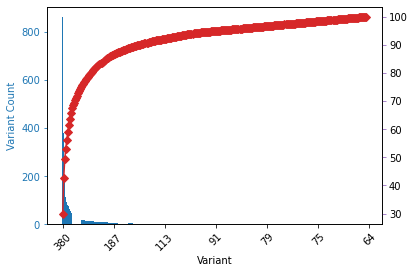

In [213]:
fig,ax1 = plt.subplots()
ax1.bar(variants_df.index,variants_df["count"],color="C0")
ax1.set_ylabel("Variant Count",color = "C0")
ax1.tick_params(axis="y",colors = "C0")
ax1.set_xlabel("Variant")
ax1.set_xticklabels(variants_df["count"],rotation=45)
ax2 = ax1.twinx()
ax2.plot(variants_df.index,variants_df["percantage"],color = "C3",marker = "D",ms = 5)
ax2.tick_params(axis = "y",color = "C4")
plt.show()

Pareto charts are extremely useful for analyzing what problems need attention first because the taller bars on the chart, which represent frequency, clearly illustrate which variables have the greatest cumulative effect on a given system. 



 one of the seven basic tools of quality control.

we need to focus first bars

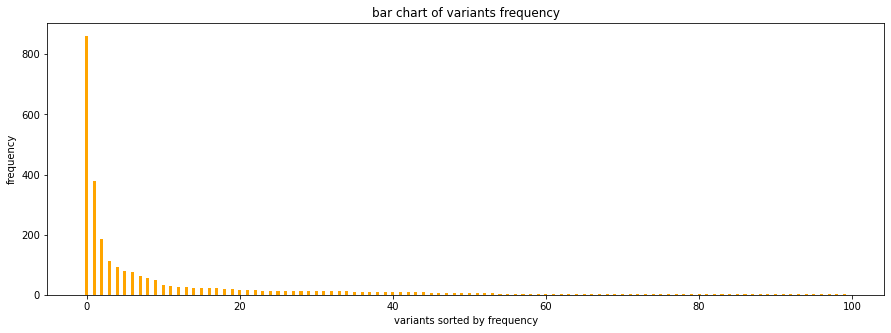

In [214]:
# Prepare the dimensions to plot
# Put variants and counts into lists of prefered length

variant = variants_df[0:100].index
frequency = variants_df[0:100]['count']
# return a list of log values from a list 
frequency_log = [math.log(i, 2) for i in frequency] 
#print(frequency)
#print(frequency_log)

# Plot the histogram of the frequencies

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(variant, frequency, color ='orange',
        width = 0.4)
 
plt.xlabel("variants sorted by frequency")
plt.ylabel("frequency")
plt.title("bar chart of variants frequency")
plt.show()

In [215]:
mean_duration = profile[(profile['Duration'] > np.timedelta64(25, 'h'))].agg('mean')

mean_duration

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


Activity                     11.604964
Resource                      1.999655
Duration    71 days 06:37:08.933815926
dtype: object

In [216]:
numb_of_handled = 0
total_case = 0
rejected = 0
variant_dist = []
for variant in variants_count_int:
  variant_dist.append(variant['count'])
  total_case += variant["count"]
  if  "Handled" in variant['variant']:
    numb_of_handled += variant['count']
  if "REJECTED" in variant['variant']:
      rejected += variant['count']
print('handled_count', numb_of_handled)
print('rejected',rejected)

handled_count 2900
rejected 759


In [217]:
ratio = numb_of_handled/total_case
print("handle ratio:" +str(ratio) )

handle ratio:0.9996552912788693


In [218]:
print('Total case:' + str(total_case))

Total case:2901


In [219]:
variant_dist

[861,
 380,
 187,
 113,
 91,
 79,
 75,
 64,
 57,
 48,
 31,
 28,
 25,
 25,
 24,
 24,
 22,
 21,
 19,
 19,
 16,
 16,
 15,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 11,
 11,
 11,
 11,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [220]:
import statistics
print('mean =', statistics.mean(variant_dist))
"""print('median =', statistics.median(variant_dist))
print('mode = ', statistics.mode(variant_dist))"""

mean = 9.734899328859061


"print('median =', statistics.median(variant_dist))\nprint('mode = ', statistics.mode(variant_dist))"

Mean: the average, which is found by adding up all the values in a set of data and dividing it by the total number of values you added together.


Median: the middle number in the set of values. You find it by putting the numbers in order from the smallest to largest and covering up one number on each end until you get to the middle.


Mode: the number or value, which appears most often in the set. To find the mode, you need to count how many times each value appears.


In [221]:
rejections = get_rejections(int_dec)

In [222]:
rejection_details = get_rejections_per_role(rejections)


Role              Rejections 
-----------------------------
Administration            803
Supervisor                 44
Director                    1
Budget owner                8
Employee                    3
-----------------------------
Total                     859


In [223]:
len(variant_dist)

298

[861, 380, 187, 113, 91, 79, 75, 64, 57, 48, 31, 28, 25, 25, 24, 24, 22, 21, 19, 19, 16, 16, 15, 14, 14, 14, 14, 13, 13, 13, 12, 11, 11, 11, 11, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


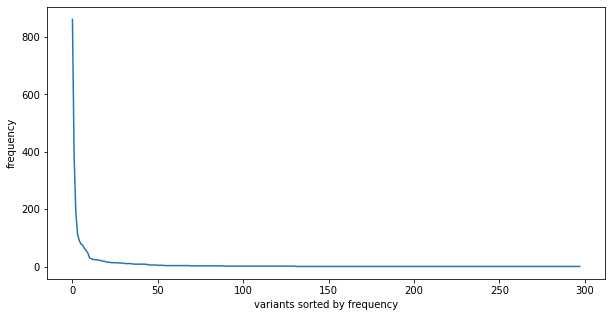

In [224]:
fig = plt.figure(figsize = (10, 5))
print(variant_dist)

plt.plot(variant_dist)
plt.xlabel('variants sorted by frequency')
plt.ylabel('frequency')
plt.show()

In [273]:
for variant in variant_dist:
  if variant < 10:
    variant_dist.remove(variant)

In [274]:
len(variant_dist)

68

In [277]:
variant_dist

[861,
 380,
 187,
 113,
 91,
 79,
 75,
 64,
 57,
 48,
 31,
 28,
 25,
 25,
 24,
 24,
 22,
 21,
 19,
 19,
 16,
 16,
 15,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 11,
 11,
 11,
 11,
 10,
 8,
 5,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

[861, 380, 187, 113, 91, 79, 75, 64, 57, 48, 31, 28, 25, 25, 24, 24, 22, 21, 19, 19, 16, 16, 15, 14, 14, 14, 14, 13, 13, 13, 12, 11, 11, 11, 11, 10, 8, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


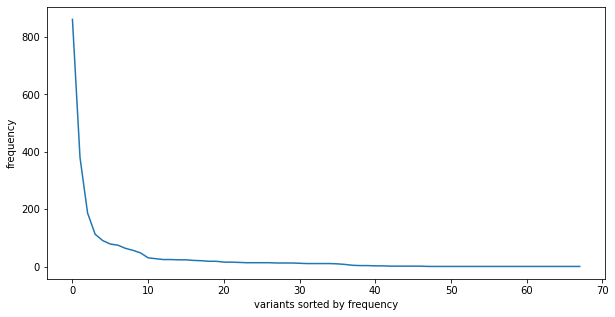

In [275]:
fig = plt.figure(figsize = (10, 5))
print(variant_dist)

plt.plot(variant_dist)
plt.xlabel('variants sorted by frequency')
plt.ylabel('frequency')
plt.show()

In [276]:
import statistics
print('mean =', statistics.mean(variant_dist))
print('median =', statistics.median(variant_dist))
print('mode = ', statistics.mode(variant_dist))

mean = 36.161764705882355
median = 11.0
mode =  1


In [ ]:
variants_df = pd.DataFrame.from_records(variants_count_int)


In [228]:
pm4py.write_xes(int_dec_datalog, 'int_dec_updated_datalog.xes')
pm4py.write_xes(int_dec, 'int_dec_updated_int_Dec.xes')

exporting log, completed traces ::   0%|          | 0/2901 [00:00<?, ?it/s]

exporting log, completed traces ::   0%|          | 0/2901 [00:00<?, ?it/s]

In [229]:
print(len(int_dec_datalog))

33666


# DFG DISCOVERY

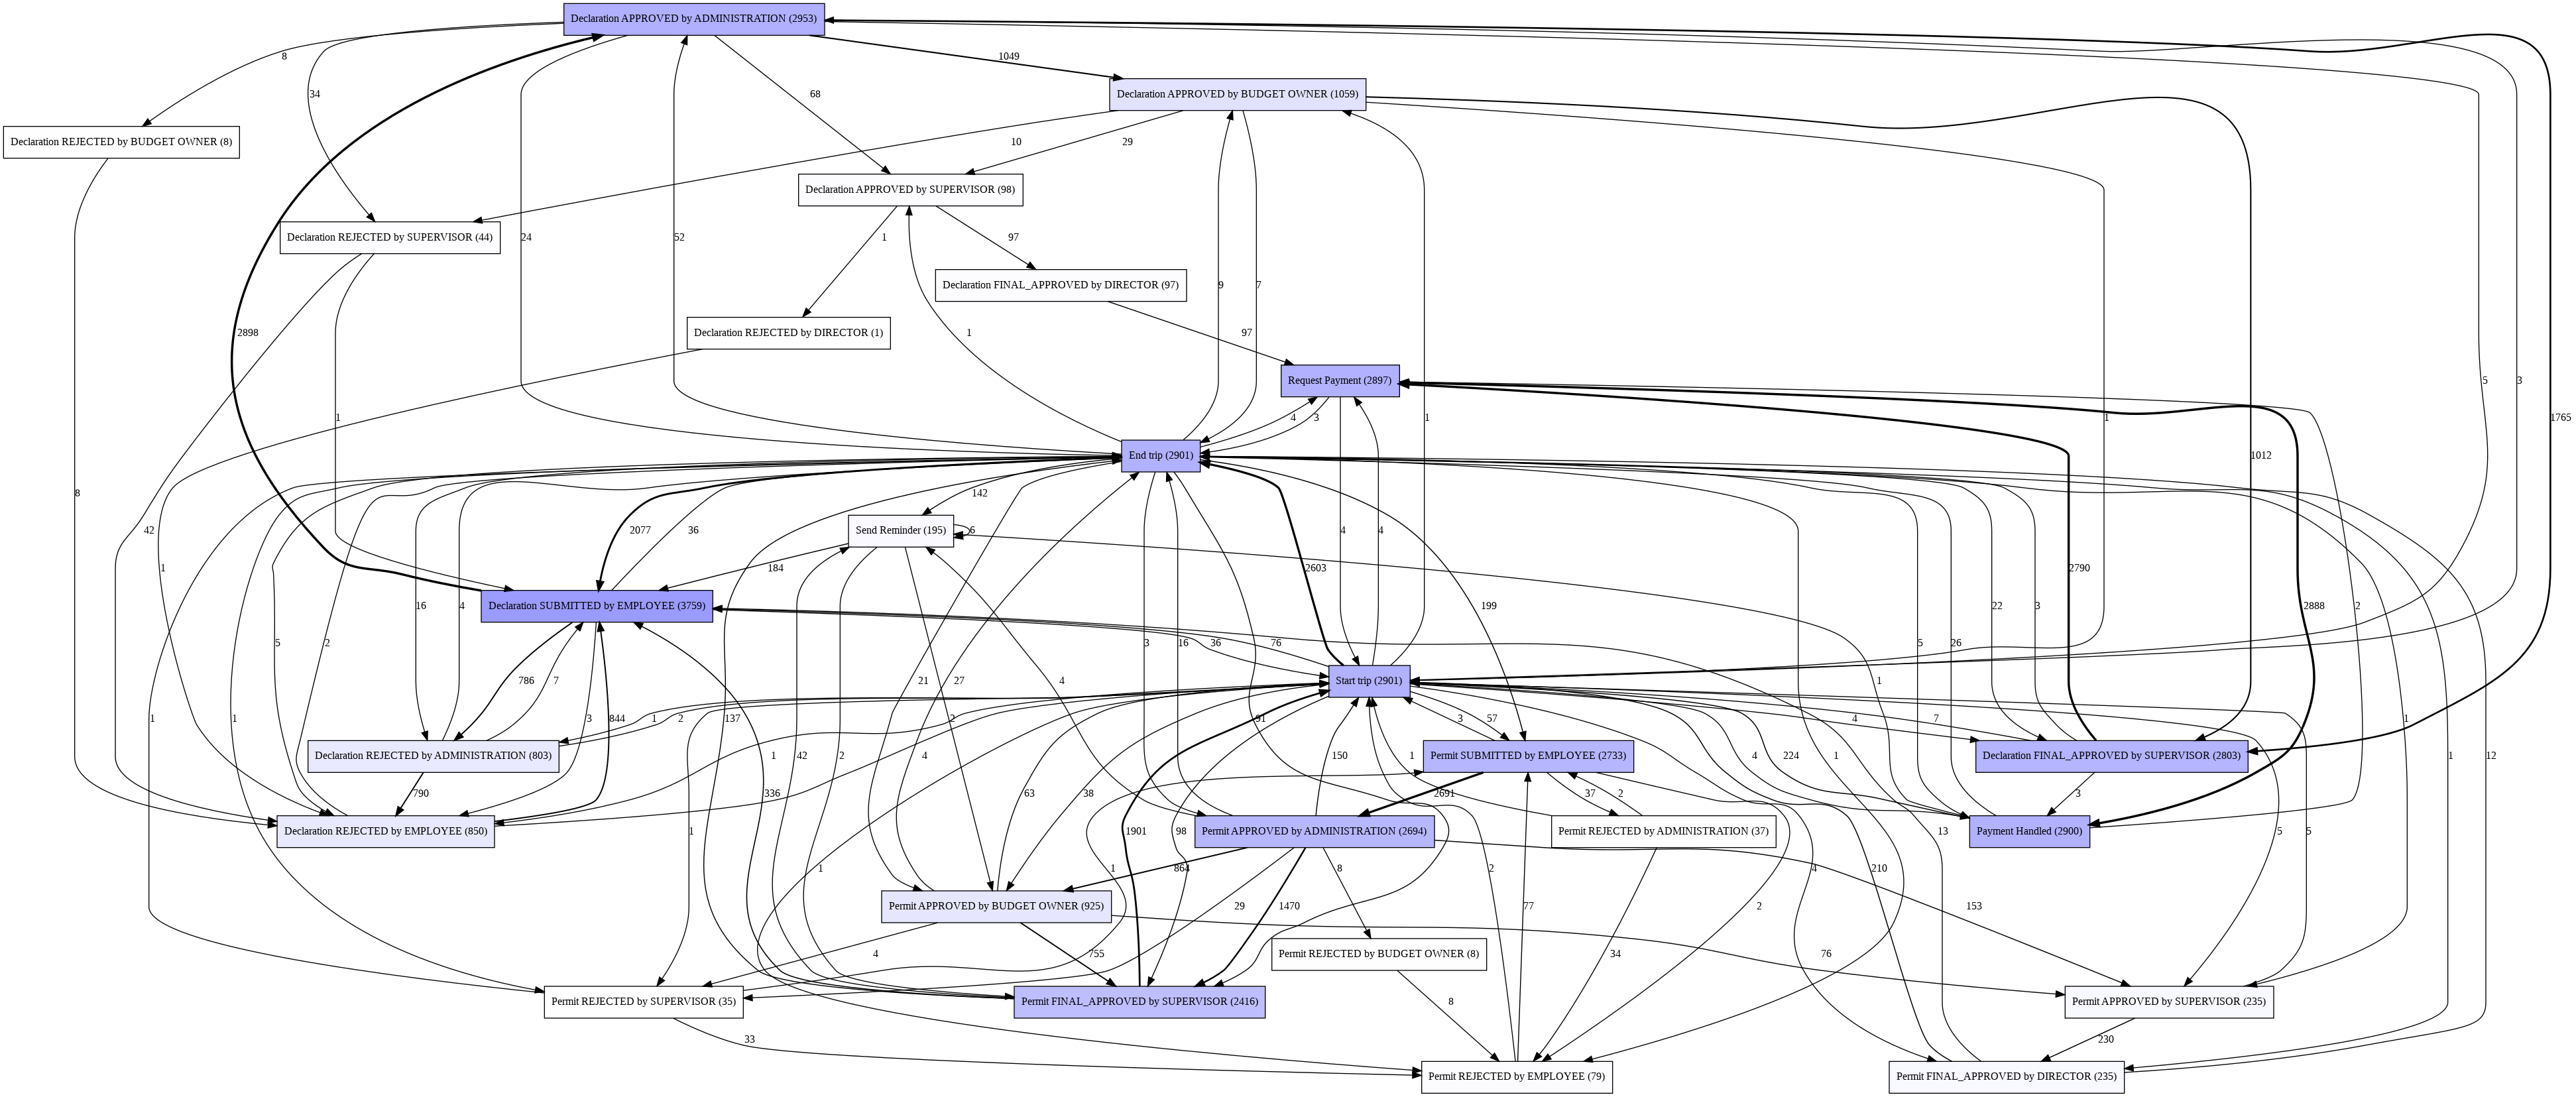

In [230]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(int_dec_datalog)
# Visualise
gviz = dfg_visualization.apply(dfg, log=int_dec_datalog, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [231]:
from pm4py.algo.discovery.batches import algorithm 

batches = algorithm.apply(int_dec)

for act_res in batches:
    print("")
    print("activity: "+act_res[0][0]+" resource: "+act_res[0][1])
    print("number of distinct batches: "+str(act_res[1]))
    for batch_type in act_res[2]:
        print(batch_type, len(act_res[2][batch_type]))


activity: Declaration SUBMITTED by EMPLOYEE resource: STAFF MEMBER
number of distinct batches: 712
Simultaneous 2
Concurrent batching 710

activity: Request Payment resource: SYSTEM
number of distinct batches: 618
Concurrent batching 618

activity: Declaration FINAL_APPROVED by SUPERVISOR resource: STAFF MEMBER
number of distinct batches: 576
Simultaneous 68
Concurrent batching 508

activity: Permit SUBMITTED by EMPLOYEE resource: STAFF MEMBER
number of distinct batches: 513
Simultaneous 38
Concurrent batching 475

activity: Declaration APPROVED by ADMINISTRATION resource: STAFF MEMBER
number of distinct batches: 507
Simultaneous 1
Concurrent batching 506

activity: Permit APPROVED by ADMINISTRATION resource: STAFF MEMBER
number of distinct batches: 502
Simultaneous 37
Concurrent batching 465

activity: Permit FINAL_APPROVED by SUPERVISOR resource: STAFF MEMBER
number of distinct batches: 492
Simultaneous 67
Concurrent batching 425

activity: Start trip resource: STAFF MEMBER
number o

========

# Process Discovery

## Petri Net Alpha Miner

In [232]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# Discover a Petri Net using Alpha Miner
net, im, fm = alpha_miner.apply(int_dec_datalog)

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

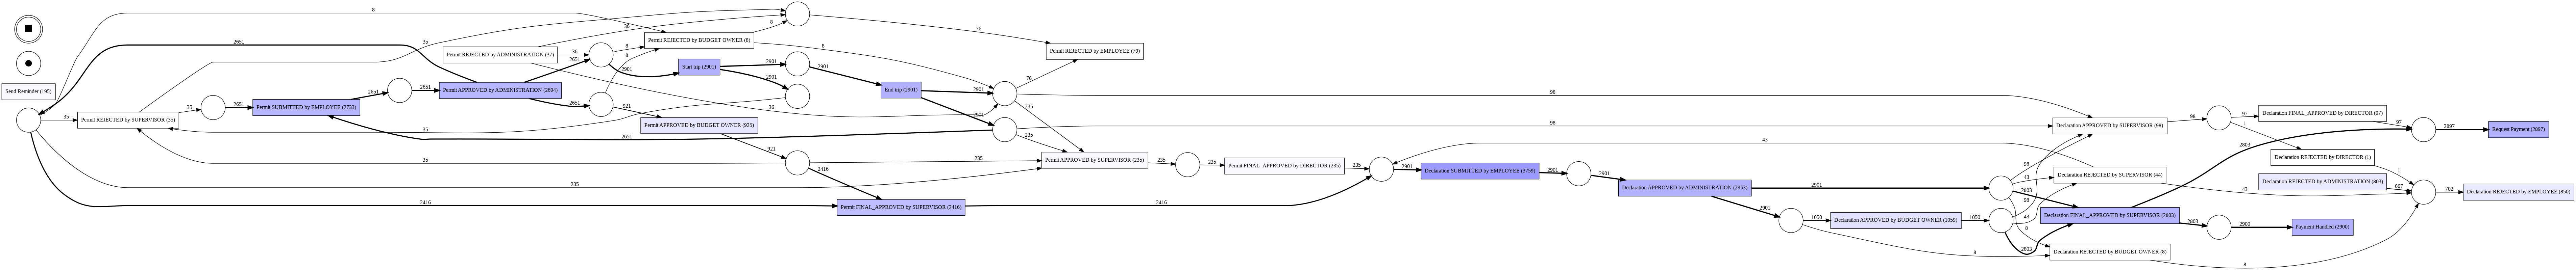

In [233]:
# Visualise 
gviz = pn_visualizer.apply(net, im, fm, variant=pn_visualizer.Variants.FREQUENCY, log=int_dec_datalog)
pn_visualizer.view(gviz)

Confarmance checking values for alpha miner

In [234]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

Why precision is 0 
https://www.win.tue.nl/promforum/discussion/1172/why-does-the-precision-and-generalization-have-a-value-of-0-00000

In [235]:
fitness_am = replay_fitness_evaluator.apply(int_dec_datalog, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness_am)

prec_am = precision_evaluator.apply(int_dec_datalog, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec_am)
#Precision is 0 this means True Positives equals 0. There is no positice identification correct.

gen_am = generalization_evaluator.apply(int_dec_datalog, net, im, fm)
print('Generalization: ', gen_am)

simp_am = simplicity_evaluator.apply(net)
print('Simplicity: ', simp_am)

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6657552843261098, 'log_fitness': 0.6718310255940221, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/1872 [00:00<?, ?it/s]

Precision:  0.0


replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Generalization:  0.8835289374302562
Simplicity:  0.5268817204301075


A process model that lacks precision
shows extra behaviours that do not exist in the event
log.

In [236]:
#Heuristic miner

A process tree is a tool for visualizing and archiving the various stages of a given planning and development project in chronological order. It brings several types of information together in one place, thus creating a general picture of the matter at hand

##Heuristic Miner Petri nets  with different threshold 0.7-0.9

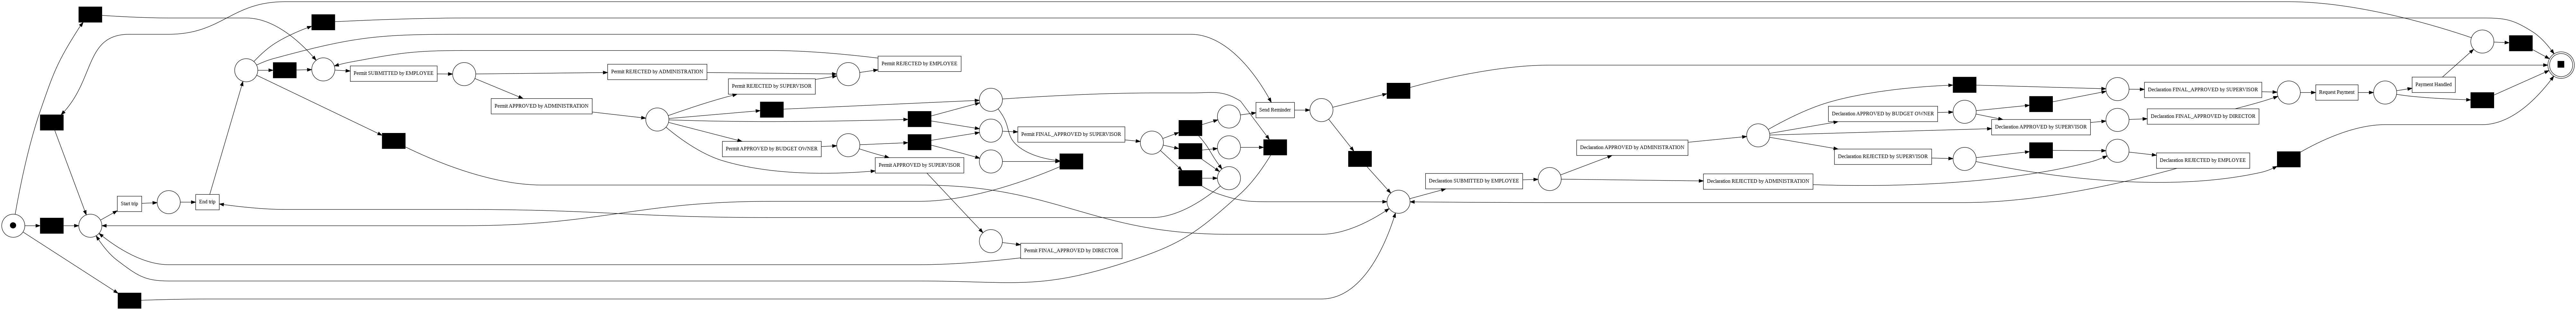

In [237]:
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.7, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 4, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 20} 
net, im, fm = heuristics_miner.apply(int_dec_datalog, parameters=parameters)
# Visualise a Petri Net
gviz = pn_visualizer.apply(net, im, fm, log=int_dec_datalog)
pn_visualizer.view(gviz)

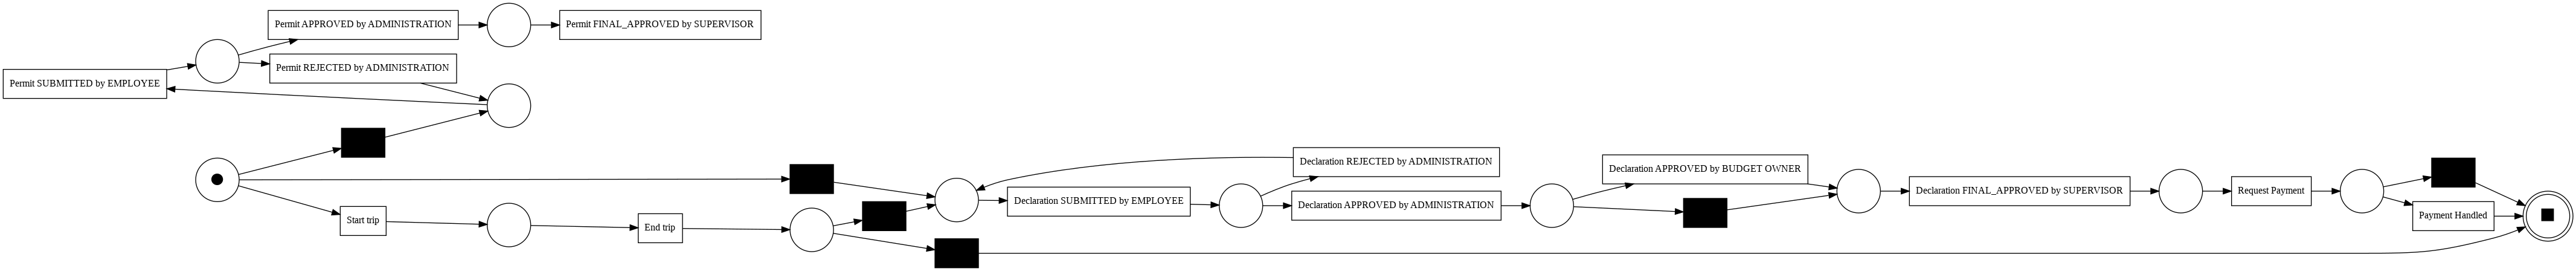

In [238]:
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.999, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 4, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 20} 
net, im, fm = heuristics_miner.apply(int_dec_datalog, parameters=parameters)
# Visualise a Petri Net
gviz = pn_visualizer.apply(net, im, fm, log=int_dec_datalog)
pn_visualizer.view(gviz)

In [239]:
fitness_heu = replay_fitness_evaluator.apply(int_dec_datalog, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness_heu)

prec_heu = precision_evaluator.apply(int_dec_datalog, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec_heu)

gen_heu = generalization_evaluator.apply(int_dec_datalog, net, im, fm)
print('Generalization: ', gen_heu)

simp_heu = simplicity_evaluator.apply(net)
print('Simplicity: ', simp_heu)

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.9307135470527405, 'average_trace_fitness': 0.9482674313502847, 'log_fitness': 0.9499330652600141, 'percentage_of_fitting_traces': 0.9307135470527405}


replaying log with TBR, completed variants ::   0%|          | 0/1872 [00:00<?, ?it/s]

Precision:  0.9666530278232406


replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Generalization:  0.8658802481009067
Simplicity:  0.7619047619047619


In [244]:
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator

simulated_log = simulator.apply(net, im, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})

Getting log of 50 traces

returns a list of process executions that are allowed from the process model.2

In [245]:
simulated_log

[{'attributes': {'concept:name': '0'}, 'events': [{'concept:name': 'Start trip', 'time:timestamp': datetime.datetime(1970, 4, 26, 17, 46, 40)}, '..', {'concept:name': 'End trip', 'time:timestamp': datetime.datetime(1970, 4, 26, 17, 46, 41)}]}, '....', {'attributes': {'concept:name': '49'}, 'events': [{'concept:name': 'Permit SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(1970, 4, 26, 17, 51, 7)}, '..', {'concept:name': 'Permit FINAL_APPROVED by SUPERVISOR', 'time:timestamp': datetime.datetime(1970, 4, 26, 17, 51, 9)}]}]

## Inductive Miner Petri net

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

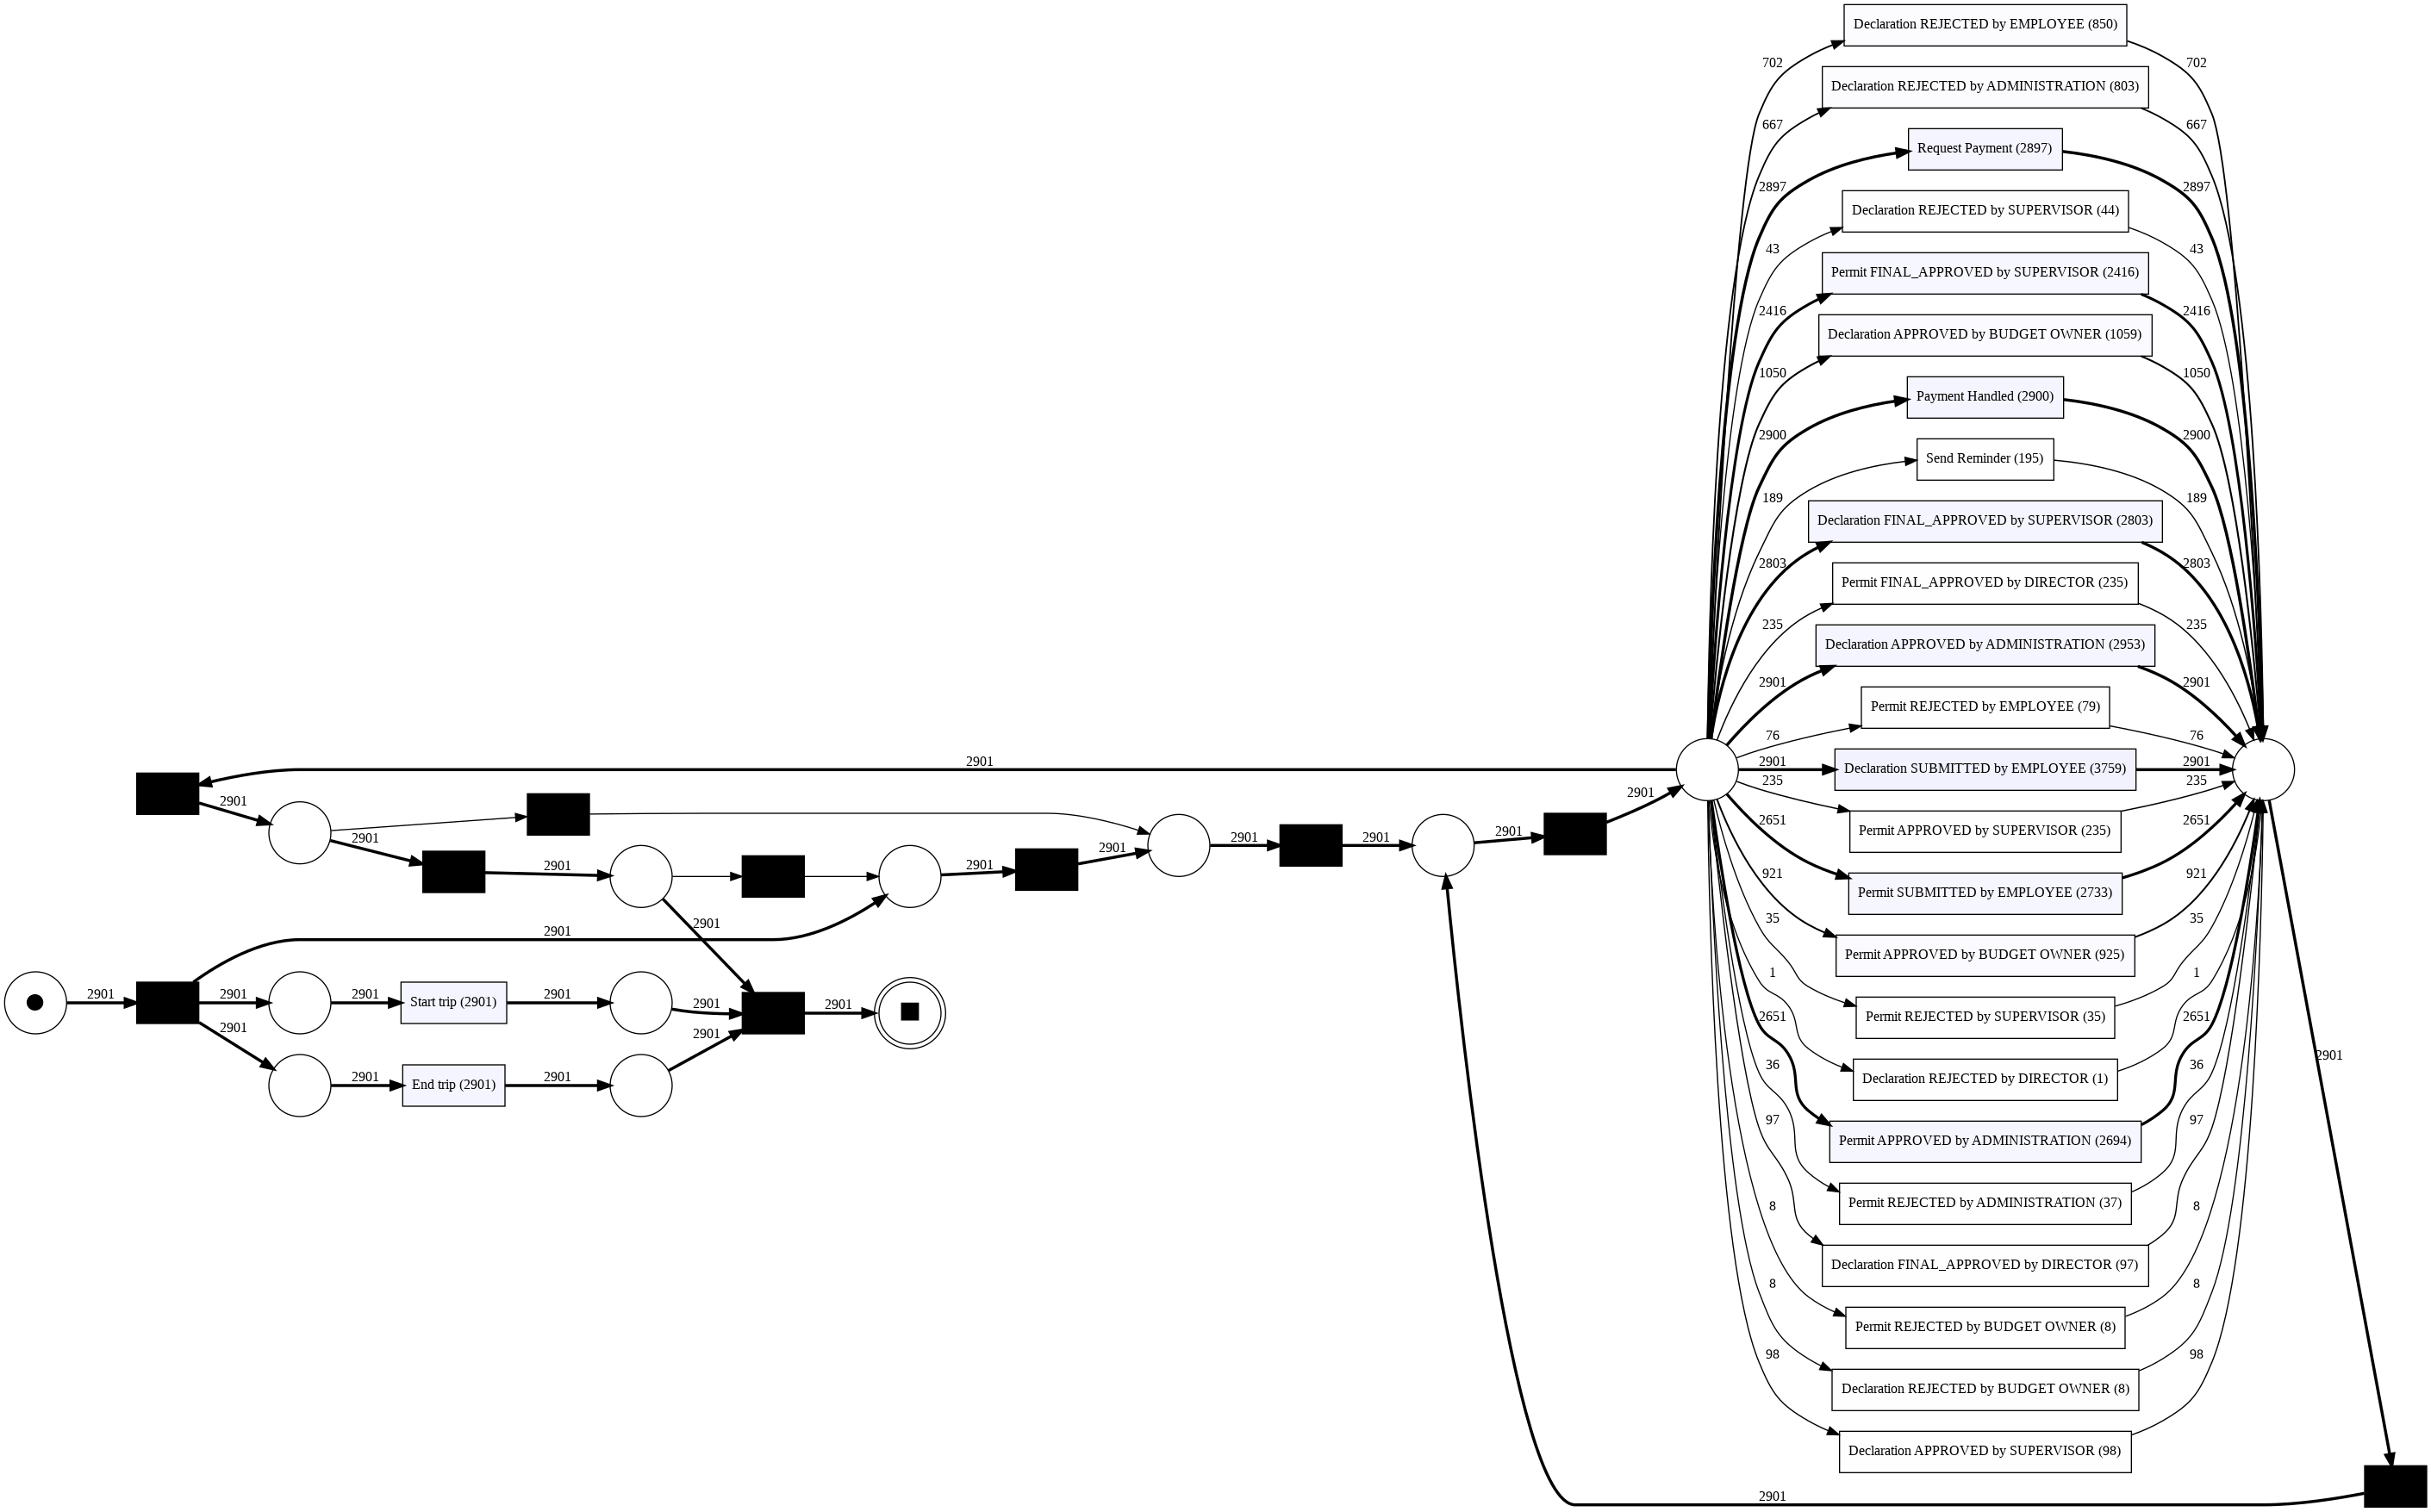

In [246]:
# Discover process tree using Inductive Miner Infrequent
# Produces a more precise model, without fitness guarantees, by eliminating some behavior.
tree = inductive_miner.apply_tree(int_dec_datalog)

# Convert process tree into a Petri Net
net, im, fm = pt_converter.apply(tree)
## Visualise
gviz = pn_visualizer.apply(net, im, fm, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=int_dec_datalog)
pn_visualizer.view(gviz)

In [247]:
fitness_ind = replay_fitness_evaluator.apply(int_dec_datalog, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness_ind)

prec_ind = precision_evaluator.apply(int_dec_datalog, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec_ind)

gen_ind = generalization_evaluator.apply(int_dec_datalog, net, im, fm)
print('Generalization: ', gen_ind)

simp_ind = simplicity_evaluator.apply(net)
print('Simplicity: ', simp_ind)

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed variants ::   0%|          | 0/1872 [00:00<?, ?it/s]

Precision:  0.09718078188355905


replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Generalization:  0.8569072887903535
Simplicity:  0.47572815533980584


# BPMN diagram to Petri nets

In [248]:
from pm4py.objects.conversion.bpmn import converter as bpmn_converter

bpmn_graph = pm4py.read_bpmn('/content/int_dec.bpmn')

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

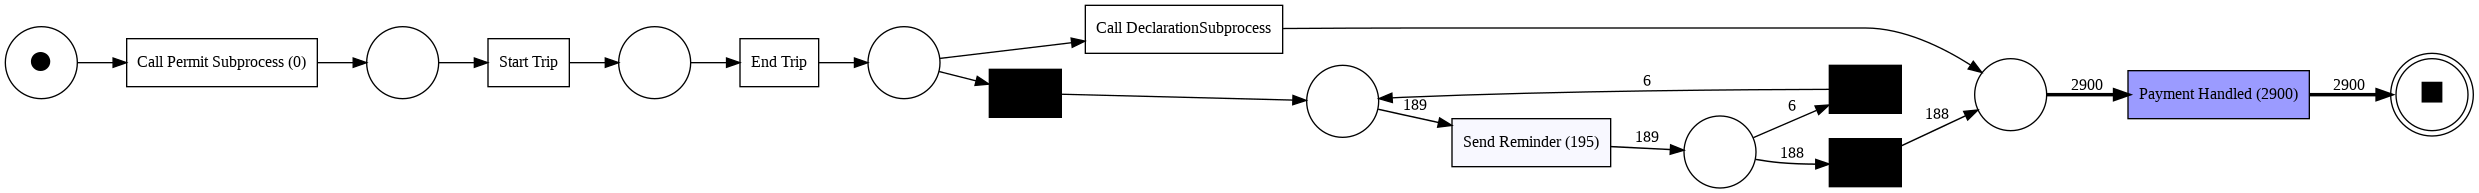

In [249]:
net, im, fm = bpmn_converter.apply(bpmn_graph)

## Visualise
gviz = pn_visualizer.apply(net, im, fm, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=int_dec
                           )
pn_visualizer.view(gviz)

In [250]:
fitness_bp = replay_fitness_evaluator.apply(int_dec, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness_bp)

prec_bp = precision_evaluator.apply(int_dec, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec_bp)

gen_bp = generalization_evaluator.apply(int_dec, net, im, fm)
print('Generalization: ', gen_bp)

simp_bp = simplicity_evaluator.apply(net)
print('Simplicity: ', simp_bp)

replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5162070550384925, 'log_fitness': 0.5311793214862681, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed variants ::   0%|          | 0/1872 [00:00<?, ?it/s]

Precision:  0.0


replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

Generalization:  0.38095979917394907
Simplicity:  0.8947368421052632


In [252]:
#=====

In [256]:
# Conformance Cheking
# Token-based replay matches a trace and a Petri net model,

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay


In [257]:

# Token-based replay matches a trace and a Petri net model,

replayed_traces = token_replay.apply(int_dec, net, im, fm)


replaying log with TBR, completed variants ::   0%|          | 0/298 [00:00<?, ?it/s]

In [258]:
print("Number of traces", len(replayed_traces))


Number of traces 2901


In [279]:
for i in range(0,2901):
  print(replayed_traces[i]["trace_fitness"])

0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.75
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.

In [284]:
anomalous_traces = []
i = 0
while i < len(replayed_traces):
  if replayed_traces[i]["trace_fitness"] < 0.50:
    anomalous_traces.append(int_dec[i].attributes["concept:name"])
  
  i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

declaration 27616
Number of anomalous traces  1


In [285]:
transitions_with_problems_list = []
for i in range(0,2901):
  transitions_with_problems_list.append(replayed_traces[i]["transitions_with_problems"])

print(transitions_with_problems_list)

[[(Activity_0mtguwu, 'Payment Handled')], [(Activity_0hn3nu5, 'Send Reminder')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0hn3nu5, 'Send Reminder')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu, 'Payment Handled')], [(Activity_0mtguwu,

In [281]:
anomalous_traces_type = {}
anomalous_traces_type_keys = []


i = 0
while i < len(replayed_traces):
  if transitions_with_problems_list[i] : # Empty lists are considered False in Python
    key = i
    anomalous_traces_type[key] = replayed_traces[i]["transitions_with_problems"][0]
    anomalous_traces_type_keys.append(key)
    #print(replayed_traces[i]["transitions_with_problems"][0])
  
  i += 1
print(anomalous_traces_type)
print(type(anomalous_traces_type))

{0: (Activity_0mtguwu, 'Payment Handled'), 1: (Activity_0hn3nu5, 'Send Reminder'), 2: (Activity_0mtguwu, 'Payment Handled'), 3: (Activity_0mtguwu, 'Payment Handled'), 4: (Activity_0mtguwu, 'Payment Handled'), 5: (Activity_0mtguwu, 'Payment Handled'), 6: (Activity_0mtguwu, 'Payment Handled'), 7: (Activity_0mtguwu, 'Payment Handled'), 8: (Activity_0hn3nu5, 'Send Reminder'), 9: (Activity_0mtguwu, 'Payment Handled'), 10: (Activity_0mtguwu, 'Payment Handled'), 11: (Activity_0mtguwu, 'Payment Handled'), 12: (Activity_0mtguwu, 'Payment Handled'), 13: (Activity_0mtguwu, 'Payment Handled'), 14: (Activity_0mtguwu, 'Payment Handled'), 15: (Activity_0mtguwu, 'Payment Handled'), 16: (Activity_0mtguwu, 'Payment Handled'), 17: (Activity_0mtguwu, 'Payment Handled'), 18: (Activity_0mtguwu, 'Payment Handled'), 19: (Activity_0mtguwu, 'Payment Handled'), 20: (Activity_0mtguwu, 'Payment Handled'), 21: (Activity_0mtguwu, 'Payment Handled'), 22: (Activity_0mtguwu, 'Payment Handled'), 23: (Activity_0mtguwu, '

In [282]:
# store the names (the keys of the new dict) as a set (keeps elements unique)
att = set(anomalous_traces_type.values())

# use a list comprehension, iterating through keys and checking the values match each n
anomalous_traces_type_groups = {}
for n in att:
    anomalous_traces_type_groups[n] = [k for k in anomalous_traces_type.keys() if anomalous_traces_type[k] == n]
print(anomalous_traces_type_groups)

{(Activity_0mtguwu, 'Payment Handled'): [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

This numbers are meaning the paymetn handled
And the missing numbers like 1 is send reminder

List of send reminder activitys are
[1, 8, 53, 90, 101, 115, 124, 127, 143, 170, 253, 290, 291, 318, 319, 343, 391, 424, 468, 477, 485, 488, 497, 519, 574, 603, 632, 638, 650, 673, 682, 687, 706, 724, 750, 751, 772, 775, 778, 817, 838, 857, 859, 860, 861, 916, 917, 927, 933, 935, 947, 954, 955, 971, 982, 997, 1036, 1050, 1056, 1066, 1074, 1098, 1162, 1169, 1178, 1198, 1200, 1219, 1220, 1232, 1235, 1239, 1249, 1280, 1290, 1295, 1302, 1333, 1335, 1371, 1391, 1429, 1430, 1433, 1477, 1495, 1519, 1580, 1583, 1585, 1588, 1596, 1604, 1624, 1625, 1642, 1647, 1649, 1699, 1703, 1708, 1709, 1716, 1718, 1726, 1743, 1745, 1753, 1756, 1763, 1766, 1785, 1786, 1800, 1807, 1814, 1815, 1846, 1849, 1850, 1858, 1866, 1890, 1920, 1921, 1962, 1970, 1982, 1996, 1997, 2006, 2011, 2031, 2048, 2057, 2058, 2059, 2063, 2068, 2069, 2133, 2146, 2156, 2158, 2183, 2194, 2250, 2261, 2268, 2279, 2294, 2301, 2302, 2303, 2336, 2342, 2349, 2358, 2368, 2372, 2389, 2411, 2423, 2440, 2453, 2461, 2463, 2465, 2467, 2469, 2471, 2473, 2503, 2537, 2538, 2543, 2545, 2558, 2567, 2580, 2588, 2624, 2637, 2646, 2648, 2687, 2692, 2736]}

In [283]:
# store the names (the keys of the new dict) as a set (keeps elements unique)
att = set(anomalous_traces_type.values())

# use a list comprehension, iterating through keys and checking the values match each n
anomalous_traces_type_groups = {}
for n in att:
    anomalous_traces_type_groups[n] = [k for k in anomalous_traces_type.keys() if anomalous_traces_type[k] == n]
print(anomalous_traces_type_groups)

{(Activity_0mtguwu, 'Payment Handled'): [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222